## Получение списка допустимых символов

In [24]:
DATA_PATH = 'data'

In [25]:
import os

listdir = os.listdir(DATA_PATH)

characters = [character if character != 'times' else '*' for character in listdir]

print(characters)

['(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'h', 't', '*', 'w', 'X', 'y']


## Генерирование случайных строк

In [27]:
import random

def generate_random_strings(count, characters, min_characters_in_string, max_characters_in_string):
    strings = []

    for _ in range(count):
        strings.append(''.join(random.choices(characters, k=random.choice(list(range(min_characters_in_string, max_characters_in_string))))))

    return strings

random_strings = generate_random_strings(7, characters, 7, 14)

print(random_strings)

['*yh(5)y525w3y', '63w7y5+h2h3)5', ')h153,X5)', '64636+9', '9X1w4w101-', '6yw8,*085,', 'y(700*y5']


## Получение списков всех изображений для каждого из допустимых символов

In [29]:
from PIL import Image
import numpy

def get_images_of_character(character):
    character_folder = 'times' if character == '*' else character
    
    paths = [os.path.join(f'{DATA_PATH}/{character_folder}', name) for name in os.listdir(f'{DATA_PATH}/{character_folder}') if os.path.isfile(os.path.join(f'{DATA_PATH}/{character_folder}', name))]

    images = []

    for path in paths:
        with Image.open(path) as image:
            images.append(image.convert('RGB'))

    return images

images = dict()

for character in characters:
    images[character] = get_images_of_character(character)

## Сопоставление наборов строк с массивами конкретных (случайных) изображений

In [31]:
def map_strings_to_images(strings, images):
    strings_mapped_to_images = dict()

    for random_string in strings:
        strings_mapped_to_images[random_string] = []
    
        for character_in_string in random_string:
            strings_mapped_to_images[random_string].append(random.choice(images[character_in_string]))

    return strings_mapped_to_images

strings_mapped_to_images = map_strings_to_images(random_strings, images)

random_string = random.choice(random_strings)

print(random_string)

print(strings_mapped_to_images[random_string])

63w7y5+h2h3)5
[<PIL.Image.Image image mode=RGB size=45x45 at 0x1F4797998E0>, <PIL.Image.Image image mode=RGB size=45x45 at 0x1F46CD628A0>, <PIL.Image.Image image mode=RGB size=45x45 at 0x1F401FF7F20>, <PIL.Image.Image image mode=RGB size=45x45 at 0x1F47A8A6120>, <PIL.Image.Image image mode=RGB size=45x45 at 0x1F488651370>, <PIL.Image.Image image mode=RGB size=45x45 at 0x1F44D2E73E0>, <PIL.Image.Image image mode=RGB size=45x45 at 0x1F42C584A70>, <PIL.Image.Image image mode=RGB size=45x45 at 0x1F47CB0B980>, <PIL.Image.Image image mode=RGB size=45x45 at 0x1F4635E31D0>, <PIL.Image.Image image mode=RGB size=45x45 at 0x1F47CB4F980>, <PIL.Image.Image image mode=RGB size=45x45 at 0x1F4710EAF00>, <PIL.Image.Image image mode=RGB size=45x45 at 0x1F41E8EF860>, <PIL.Image.Image image mode=RGB size=45x45 at 0x1F47761D3A0>]


## Подготовка данных для классификации

In [33]:
def extract_images_from_characters_map(images):
    X, y = [], []

    for character in images:
        for image in images[character]:
            X.append(numpy.array(image).flatten())
            y.append(character)
    
    return X, y

X, y = extract_images_from_characters_map(images)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Тренировка

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=1)

classifier.fit(X_train, y_train)

print(classifier)
print()

for string in strings_mapped_to_images:
    vec = []

    for img in strings_mapped_to_images[string]:
        vec.append(numpy.array(img).flatten())

    result = classifier.predict(vec)

    print(string, result, accuracy_score(result, list(string)))

KNeighborsClassifier(n_neighbors=1)

*yh(5)y525w3y ['*' 'y' 'h' '(' '5' ')' 'y' '5' '2' '5' 'w' '3' 'y'] 1.0
63w7y5+h2h3)5 ['6' '3' 'w' '7' 'y' '5' '+' 'h' '2' 'h' '3' ')' '5'] 1.0
)h153,X5) [')' 'h' '1' '5' '3' ',' 'X' '5' ')'] 1.0
64636+9 ['6' '4' '6' '3' '6' '+' '9'] 1.0
9X1w4w101- ['(' 'X' '1' 'w' '4' 'w' '1' '0' '1' '-'] 0.9
6yw8,*085, ['6' 'y' 'w' '8' ',' '*' '0' '8' '5' ')'] 0.9
y(700*y5 ['y' '(' '7' '0' '0' '*' 'y' '5'] 1.0


##  Создание тестовых изображений

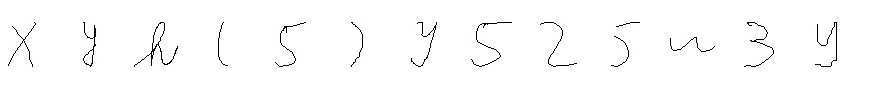

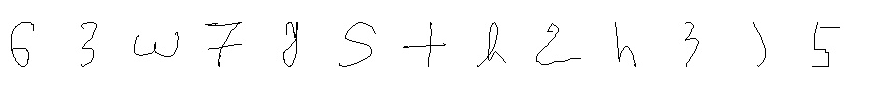

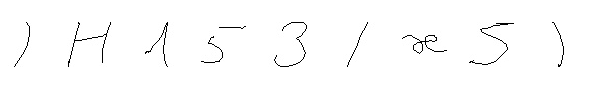

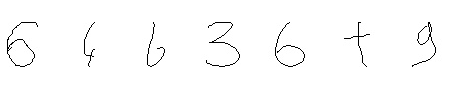

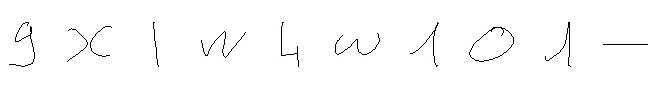

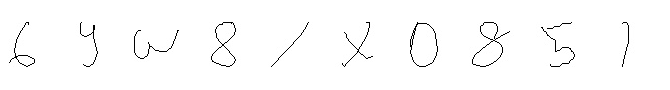

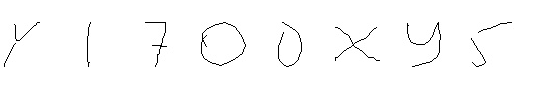

In [37]:
from IPython.display import display
from PIL import Image

def create_image_string(images):
    space = 45 // 2

    image = Image.new('RGB', (len(images) * (45 + space), 45 * 2), (255, 255, 255))

    for i, img in enumerate(images):
        image.paste(img, (i * (45 + space), 45 // 2))
    
    return image

images = []
right_strings = []

for string in strings_mapped_to_images:
    created_image = create_image_string(strings_mapped_to_images[string])
    
    images.append(created_image)
    right_strings.append(string)
    
    display(created_image)

## Распознавание тестовых изображений с помошью OpenCV

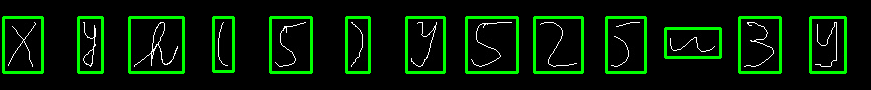

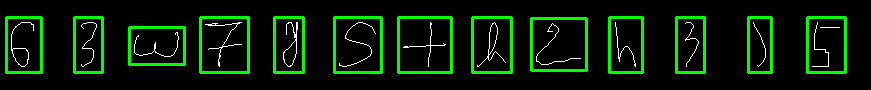

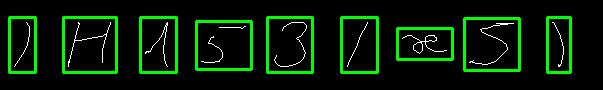

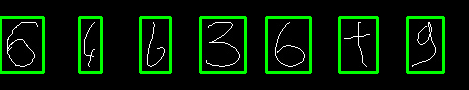

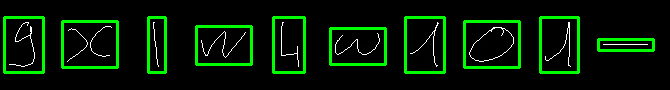

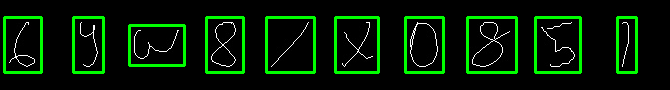

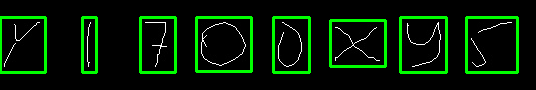

*yh(5)y525w3y ['*' ')' 'h' '(' '5' ')' ')' '5' '2' '5' ')' '3' '1'] 0.6923076923076923
63w7y5+h2h3)5 ['(' ')' 'w' '7' '1' '5' '+' 'h' '2' 'h' ')' ')' '5'] 0.6923076923076923
)h153,X5) [')' 'h' '1' '5' ',' '-' '-' '5' ')'] 0.6666666666666666
64636+9 ['(' '(' '(' '3' '(' '1' ')'] 0.14285714285714285
9X1w4w101- [')' 'X' '1' ',' '(' '1' '1' '0' '1' '-'] 0.6
6yw8,*085, ['6' ')' 'w' '2' ',' ',' '0' '8' '5' '1'] 0.6
y(700*y5 ['y' '(' ',' '0' ')' '-' '-' '5'] 0.5


In [39]:
import numpy as np
import cv2
import imutils

results = []

def gen_45x45_image_from(image):
    w, h = image.size

    nimg = Image.new('RGB', (45, 45), (255, 255, 255))

    nimg.paste(image, ((45 - w) // 2, (45 - h) // 2))
    
    return nimg

for image in images:
    image = numpy.array(image)

    image = 255 - image
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (7, 7), 12)
    
    dilate = cv2.dilate(gray, None, iterations=2)
    
    cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0]

    bounding_boxes = [cv2.boundingRect(c) for c in cnts]

    sorted_bounding_boxes = sorted(bounding_boxes, key=lambda b: b[0])
    
    orig = image.copy()
    
    i = 0

    rois = []
    
    for (x, y, w, h) in sorted_bounding_boxes:
        if(w * h < 160):
            continue
    
        roi = image[y:y+h, x:x+w]
    
        cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
        i = i + 1

        rois.append(numpy.array(gen_45x45_image_from(Image.fromarray(255 - roi))).flatten())

    display(Image.fromarray(orig))

    results.append(classifier.predict(rois))
    

for i, r in enumerate(results):
    print(right_strings[i], r, accuracy_score(r, list(right_strings[i])))

## Расчет метрики CER

In [45]:
from cer import calculate_cer
import random

def modify(string):
    orig = list(string)

    indices = list(range(0, len(string)))

    random.shuffle(indices)

    change_count = random.randrange(0, len(string))

    for i in indices:
        orig[i] = random.choice(characters)
    return ''.join(orig)

for result in results:
    orig = ''.join(result)
    modified = modify(orig)

    print(f'orig: {orig}, modified: {modified}, cer: {calculate_cer(list(orig), list(modified))}')

orig: *)h(5))525)31, modified: *y,X7)-(2651,, cer: 0.48
orig: ()w715+h2h))5, modified: 0,14h10*++(+t, cer: 0.48
orig: )h15,--5), modified: )0(,68Xt(, cer: 0.47058823529411764
orig: (((3(1), modified: 9)505-1, cer: 0.46153846153846156
orig: )X1,(1101-, modified: 8yywwy7y7(, cer: 0.5789473684210527
orig: 6)w2,,0851, modified: 6h2h0,w67-, cer: 0.42105263157894735
orig: y(,0)--5, modified: ((3062t0, cer: 0.4
